# Project 8 -- [Ryan] [Benlabhili]

**TA Help:** None

**Collaboration:** None



**Internet Resources:** None
**ChatGPT, Gemini, Claude, etc:**  https://chatgpt.com/share/68f95955-0404-8003-8981-b0b7d5822eff

(if you used any such tools, please tell us here)
- For example:  I asked ChatGPT how to define a new data frames
- Another example:  Gemini told me how to make a function for sorting my data

- ***Link to AI Chat History***: Please share a link to your chat if you used AI (ex. ChatGPT Shared Links)
**OVERALL MESSAGE:** Any time that you used anything except your brain to solve the questions in these projects, you need to disclose such resources at the start of the project, with details about your usage of the tools.

**YOUR OWN WORK:** Even when you utilize other resources, do NOT just copy and paste.  Write all explanations in your own words, using several sentences in English, which are understandable and which you wrote (and did not just copy and paste).

## Question 1

In [1]:
library(data.table)
library(lubridate)

orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

# Convert created_at to Date
orders$created_at <- as.Date(orders$created_at)

# Numeric and labeled weekdays
orders$num_day_of_the_week <- wday(orders$created_at)
orders$day_of_the_week <- wday(orders$created_at, label = TRUE)

# Tables
table(orders$num_day_of_the_week)
table(orders$day_of_the_week)
table(orders$num_day_of_the_week, orders$day_of_the_week)



Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union





    1     2     3     4     5     6     7 
18651 19676 22003 20619 22210 15906 16238 


  Sun   Mon   Tue   Wed   Thu   Fri   Sat 
18651 19676 22003 20619 22210 15906 16238 

   
      Sun   Mon   Tue   Wed   Thu   Fri   Sat
  1 18651     0     0     0     0     0     0
  2     0 19676     0     0     0     0     0
  3     0     0 22003     0     0     0     0
  4     0     0     0 20619     0     0     0
  5     0     0     0     0 22210     0     0
  6     0     0     0     0     0 15906     0
  7     0     0     0     0     0     0 16238

In [ ]:
1.1 Lubridate package:

Lubridate simplifies handling dates and times in R. It enables you to retrieve components of a date, convert strings to date objects, and carry out calculations without complex base R functions.

1.2 Rotation of days throughout the week:

Utilizing `wday()`, we observe that 1 represents Sunday, 2 indicates Monday, and it continues sequentially to 7 for Saturday, affirming the typical Sunday-to-Saturday cycle.

1.3 Storage of date and time:

Date objects only keep the calendar date (year, month, day). Objects like POSIXct that represent date-time store both the date and time as numeric values indicating seconds since a specific reference date.

Markdown notes and full English sentences and analysis written here.

## Question 2


  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
17825 23683     0     0     1 10120 10175  8933  6609 19893 18249 19815 

 2019  2020 
93795 41508 
  Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec 
40410 51197    NA    NA     0 27839 27296 23853 16098 31527 43102 47479 


Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR,month,year
<dbl>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,...,<dttm>,<dttm>,<dttm>,<int>,<date>,<int>,<chr>,<chr>,<ord>,<dbl>


       Jan   Feb Mar Apr May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
2019    NA    NA  NA  NA   0 27839 27296 23853 16098 31527 43102 47479
2020 40410 51197  NA  NA  NA    NA    NA    NA    NA    NA    NA    NA


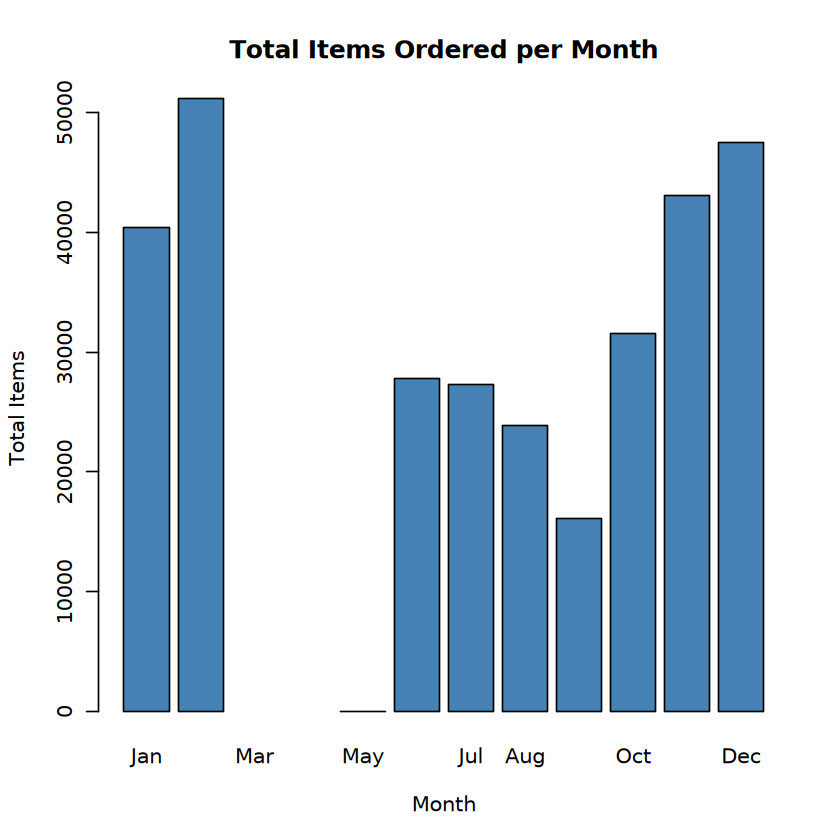

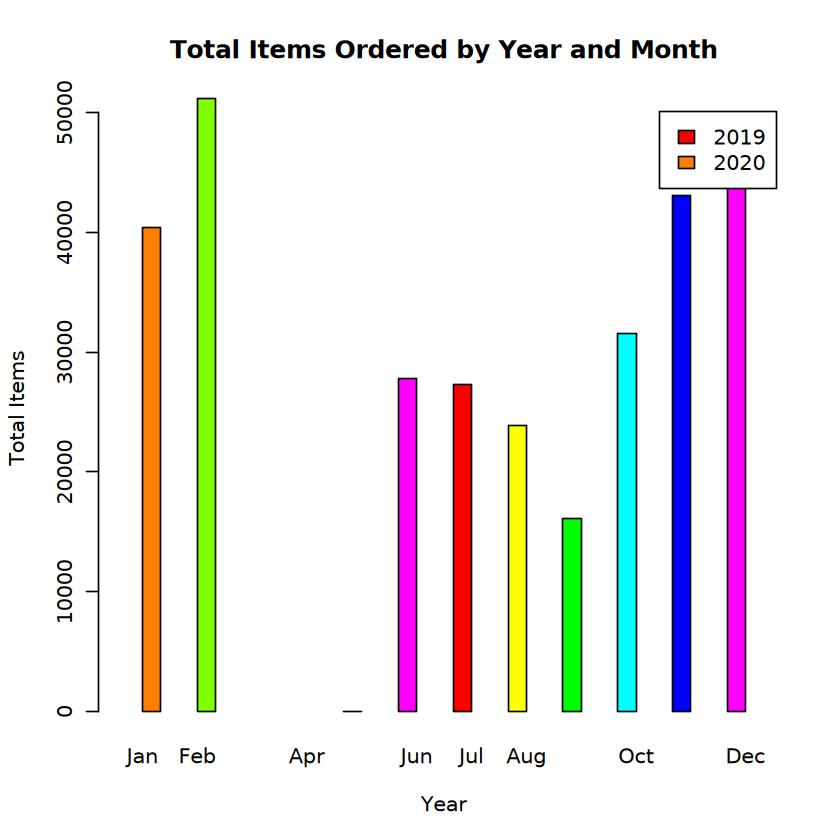

In [6]:
# code here

library(data.table)
library(lubridate)

# Read the dataset
orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

# Convert created_at to Date
orders$created_at <- as.Date(orders$created_at)

# Add month and year columns
orders$month <- month(orders$created_at, label = TRUE)  # labeled month names
orders$year <- year(orders$created_at)

# View distribution of orders by month and year
month_table <- table(orders$month)
year_table <- table(orders$year)

print(month_table)
print(year_table)

# Total item_count per month using tapply
items_per_month <- tapply(orders$item_count, orders$month, sum, na.rm = TRUE)
print(items_per_month)

# Barplot of total items per month
barplot(items_per_month,
        col = "steelblue",
        main = "Total Items Ordered per Month",
        ylab = "Total Items",
        xlab = "Month")

# Inspect why some months show NA
orders[orders$month %in% c("Mar", "Apr"), ]

# Total item_count per (year, month) pairing
items_per_year_month <- tapply(orders$item_count,
                               list(orders$year, orders$month),
                               sum, na.rm = TRUE)
print(items_per_year_month)

# Barplot of items per year and month
barplot(items_per_year_month,
        beside = TRUE,
        col = rainbow(ncol(items_per_year_month)),
        legend = TRUE,
        main = "Total Items Ordered by Year and Month",
        ylab = "Total Items",
        xlab = "Year")


In [7]:
2.1 Real duration of orders:

The orders containing items in this dataset range from the first order date (min(orders$created_at, na.rm=TRUE)) to the most recent order date (max(orders$created_at, na.rm=TRUE)), illustrating the entire timeframe when customers made purchases with items.

2.2 Reasons for March and April showing NA, while May does not:

March and April display NA in the overall item counts since there were no recorded orders with items during those months, making the total undefined. May does not indicate NA because there were orders with items, permitting the total to be calculated


ERROR: Error in parse(text = input): <text>:1:5: unexpected symbol
1: 2.1 Real
        ^


Markdown notes and full English sentences and analysis written here.

## Question 3

In [8]:
library(data.table)
library(lubridate)

# Read the 1997 Flights dataset
flights <- fread("/anvil/projects/tdm/data/flights/subset/1997.csv")

# Create a full date column in YYYY-MM-DD format
flights$full_dates <- ymd(paste(flights$Year, flights$Month, flights$DayofMonth, sep = "-"))

# Replace 2400 in DepTime with 0 (midnight)
flights$DepTime[flights$DepTime == 2400] <- 0

# Extract departure hour and minute
flights$depHour <- floor(flights$DepTime / 100)
flights$depMinute <- flights$DepTime %% 100  # remainder after dividing by 100

# Create datetime column using make_datetime
flights$date_times <- make_datetime(year = flights$Year,
                                    month = flights$Month,
                                    day = flights$DayofMonth,
                                    hour = flights$depHour,
                                    min = flights$depMinute)

# View first few rows to confirm
head(flights[, .(DepTime, depHour, depMinute, date_times)])


DepTime,depHour,depMinute,date_times
<dbl>,<dbl>,<dbl>,<dttm>
1615,16,15,1997-01-28 16:15:00
1624,16,24,1997-01-29 16:24:00
1626,16,26,1997-01-30 16:26:00
1628,16,28,1997-01-31 16:28:00
1503,15,3,1997-01-14 15:03:00
1029,10,29,1997-01-01 10:29:00


In [9]:
3.3-The `ymd()` function represents **Year-Month-Day**.It is utilized to transform character or numeric inputs that denote a date in
“YYYY-MM-DD” format into a **Date object** in R. This enables R to identify and handle the data as real calendar dates, 
facilitating calculations, comparisons, and other date-time functions.


ERROR: Error in parse(text = input): <text>:1:9: unexpected symbol
1: 3.3-The `ymd()`
            ^


Markdown notes and full English sentences and analysis written here.

## Question 4

In [ ]:
# code here
library(data.table)
library(lubridate)

# Assuming flights dataset is already loaded and processed from Question 3

# 1. Create dataframes for each origin
bostonDF <- flights[Origin == "BOS"]
phoenixDF <- flights[Origin == "PHX"]
chicagoDF <- flights[Origin == "MDW"]
seattleDF <- flights[Origin == "SEA"]

# 2. Calculate average distance per month using tapply
boston_distance <- tapply(bostonDF$Distance, bostonDF$Month, mean, na.rm = TRUE)
phoenix_distance <- tapply(phoenixDF$Distance, phoenixDF$Month, mean, na.rm = TRUE)
chicago_distance <- tapply(chicagoDF$Distance, chicagoDF$Month, mean, na.rm = TRUE)
seattle_distance <- tapply(seattleDF$Distance, seattleDF$Month, mean, na.rm = TRUE)

# 3. Plot individual line plots
plot(boston_distance, type='b', col='blue', main='Average Distance per Month - BOS',
     xlab='Month', ylab='Average Distance')
plot(phoenix_distance, type='b', col='orange', main='Average Distance per Month - PHX',
     xlab='Month', ylab='Average Distance')
plot(chicago_distance, type='b', col='red', main='Average Distance per Month - MDW',
     xlab='Month', ylab='Average Distance')
plot(seattle_distance, type='b', col='green', main='Average Distance per Month - SEA',
     xlab='Month', ylab='Average Distance')

# 4. Combined plot with consistent y-axis limits
plot(boston_distance, type='b', col='blue', ylim=c(300, 1200),
     main='Average Distance From Boston, Phoenix, Chicago, and Seattle',
     xlab='Months', ylab='Average Distance')
lines(phoenix_distance, type='b', col='orange')
lines(chicago_distance, type='b', col='red')
lines(seattle_distance, type='b', col='green')
legend("topright", legend=c("BOS","PHX","MDW","SEA"),
       col=c("blue","orange","red","green"), lty=1, pch=1)


In [ ]:
4.3-The average flight distance variations among the four airports can be understood through their locations and common flight paths. 
Boston (BOS), located on the East Coast, typically experiences longer average flight durations due to numerous destinations being situated across
the country. Seattle (SEA), located on the West Coast, also experiences relatively lengthy flights for transcontinental routes. 
Phoenix (PHX) and Chicago Midway (MDW) are more central, resulting in shorter average distances due to their service to numerous nearby
domestic locations. In general, coastal airports exhibit greater average distances because of lengthier cross-country flights, whereas central airports
display shorter averages owing to their closeness to numerous destinations

Markdown notes and full English sentences and analysis written here.

## Question 5

In [ ]:
# code here
library(data.table)
library(lubridate)

# Assuming flights dataset is already loaded and origin-specific dataframes exist

# 1. Total distance per month for each location using tapply
boston_total <- tapply(bostonDF$Distance, bostonDF$Month, sum, na.rm = TRUE)
phoenix_total <- tapply(phoenixDF$Distance, phoenixDF$Month, sum, na.rm = TRUE)
chicago_total <- tapply(chicagoDF$Distance, chicagoDF$Month, sum, na.rm = TRUE)
seattle_total <- tapply(seattleDF$Distance, seattleDF$Month, sum, na.rm = TRUE)

# 2. Find max and min across all four locations
all_totals <- c(boston_total, phoenix_total, chicago_total, seattle_total)
total_max <- max(all_totals, na.rm = TRUE)
total_min <- min(all_totals, na.rm = TRUE)

print(paste("Maximum total distance:", total_max))
print(paste("Minimum total distance:", total_min))

# 3. Combined line plot with appropriate y-limits
plot(boston_total, type='b', col='blue',
     ylim=c(total_min, total_max),
     main='Total Distance From Boston, Phoenix, Chicago, Seattle',
     xlab='Months', ylab='Total Distance')
lines(phoenix_total, type='b', col='orange')
lines(chicago_total, type='b', col='red')
lines(seattle_total, type='b', col='green')

legend("topright", legend=c("BOS","PHX","MDW","SEA"),
       col=c("blue","orange","red","green"), lty=1, pch=1)


Markdown notes and full English sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.

https://www.purdue.edu/odos/osrr/honor-pledge/
